In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv("Desktop/Data Analytics and Science/Datasets/Nigerian_Road_Traffic_Crashes_2020_2024.csv")
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [16]:
Aks_crashes = df[df['State'] == 'Akwa Ibom']
Aks_crashes.head(4)

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
39,Q1 2021,Akwa Ibom,22,35,12,24,15,0,0,0,9
76,Q2 2021,Akwa Ibom,16,32,10,17,10,0,0,0,7
113,Q3 2021,Akwa Ibom,13,18,1,15,0,0,0,11,4


In [18]:
Aks_crashes.reset_index(drop = True, inplace = True)

In [22]:
Aks_crashes.shape

(14, 11)

In [24]:
from re import A
Aks_crashes[['Qutr', 'Year']] = Aks_crashes['Quarter'].str.split(' ', expand=True)
Aks_crashes.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2112\2667785237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aks_crashes[['Qutr', 'Year']] = Aks_crashes['Quarter'].str.split(' ', expand=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2112\2667785237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aks_crashes[['Qutr', 'Year']] = Aks_crashes['Quarter'].str.split(' ', expand=True)


,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Qutr,Year
0,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,Q4,2020
1,Q1 2021,Akwa Ibom,22,35,12,24,15,0,0,0,9,Q1,2021
2,Q2 2021,Akwa Ibom,16,32,10,17,10,0,0,0,7,Q2,2021
3,Q3 2021,Akwa Ibom,13,18,1,15,0,0,0,11,4,Q3,2021
4,Q4 2021,Akwa Ibom,22,39,10,23,0,0,0,12,11,Q4,2021


In [26]:
Aks_crashes = Aks_crashes.drop(columns = ['Quarter', 'State'])

In [8]:
Aks_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Total_Crashes            14 non-null     int64 
 1   Num_Injured              14 non-null     int64 
 2   Num_Killed               14 non-null     int64 
 3   Total_Vehicles_Involved  14 non-null     int64 
 4   SPV                      14 non-null     int64 
 5   DAD                      14 non-null     int64 
 6   PWR                      14 non-null     int64 
 7   FTQ                      14 non-null     int64 
 8   Other_Factors            14 non-null     int64 
 9   Qutr                     14 non-null     object
 10  Year                     14 non-null     object
dtypes: int64(9), object(2)
memory usage: 1.3+ KB


In [9]:
Aks_crashes.isnull().sum()

Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
Qutr                       0
Year                       0
dtype: int64

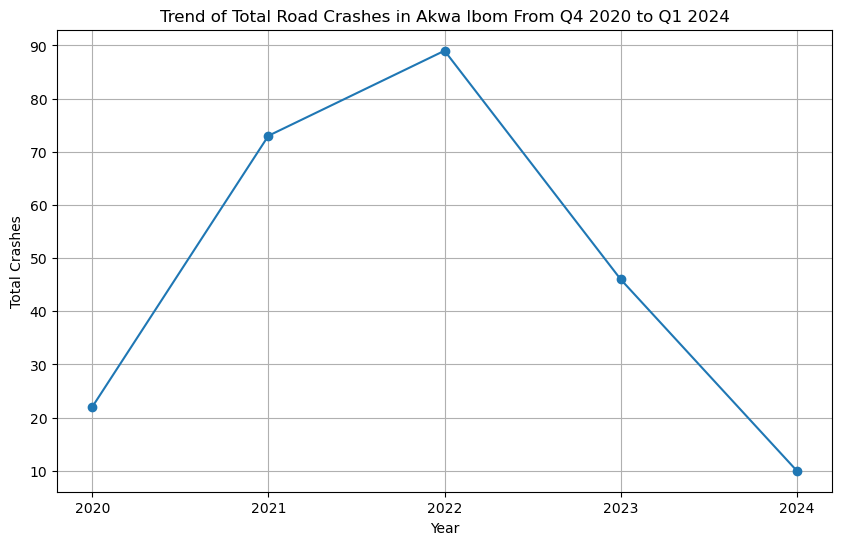

In [10]:
#some visualization
yearly_crashes = Aks_crashes.groupby('Year')['Total_Crashes'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_crashes['Year'], yearly_crashes['Total_Crashes'], marker='o', linestyle='-')
plt.title('Trend of Total Road Crashes in Akwa Ibom From Q4 2020 to Q1 2024')
plt.xlabel('Year')
plt.ylabel('Total Crashes')
plt.grid(True)
plt.show()

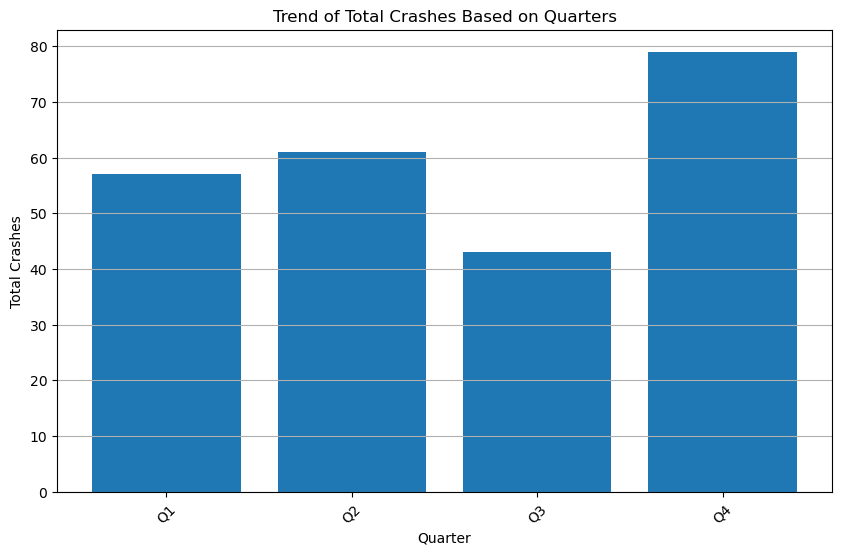

In [11]:
quarterly_crashes = Aks_crashes.groupby('Qutr')['Total_Crashes'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(quarterly_crashes['Qutr'], quarterly_crashes['Total_Crashes'])
plt.title('Trend of Total Crashes Based on Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

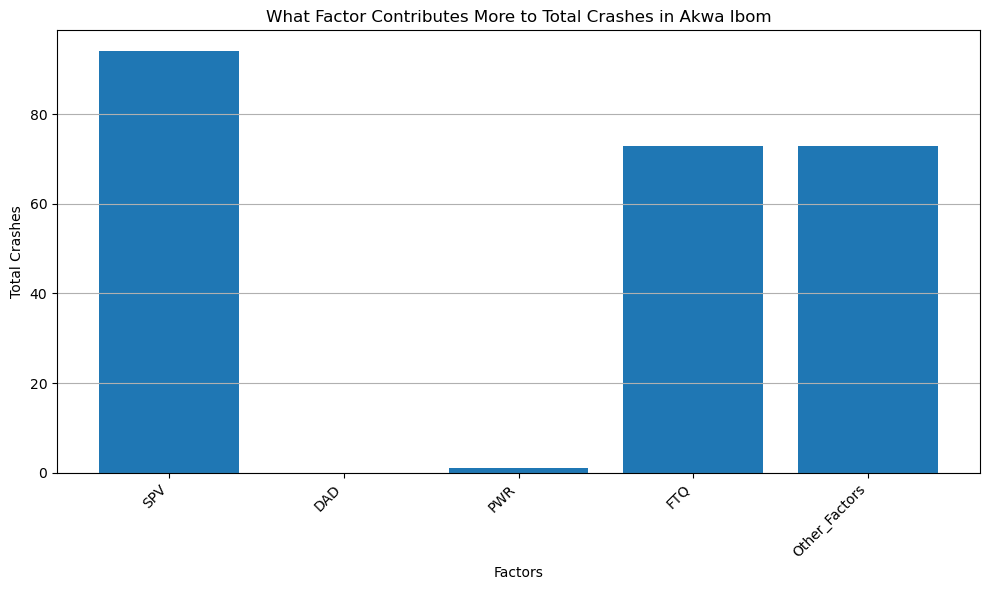

In [30]:
factor_crashes = Aks_crashes[['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']].sum()

plt.figure(figsize=(10, 6))  
plt.bar(factor_crashes.index, factor_crashes.values) 
plt.title('What Factor Contributes More to Total Crashes in Akwa Ibom')
plt.xlabel('Factors')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [42]:
Aks_crashes.columns

Index(['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved',
       'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Qutr', 'Year'],
      dtype='object')

In [68]:
x = Aks_crashes.drop(columns = ['Total_Crashes', 'Qutr'], axis = 1)
y = Aks_crashes['Total_Crashes']

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [74]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=20)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [76]:
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.08841666666667
R-squared: 0.8170961055276381


In [78]:
from flask import Flask, request, jsonify
import joblib
import os

# Save the model 
model_path = 'Aks_crashes_ml_model.joblib'
joblib.dump(rf_model, model_path)
model_path = os.path.abspath(model_path)
print(f"Model saved at: {model_path}")

# Load the model
model = joblib.load(model_path)

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Traffic Crash Prediction Model API!"

@app.route('/predict', methods=['POST'])
def predict():
    # Parse input JSON data
    data = request.json
    print("Recieved data:", data)
    try:
        # Validate input
        required_keys = ['Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Year']
        if not all(key in data for key in required_keys):
            return jsonify({'error': 'Missing required keys in input data'}), 400

        # Extract features
        features = [
            data['Num_Injured'],
            data['Num_Killed'],
            data['Total_Vehicles_Involved'],
            data['SPV'],
            data['DAD'],
            data['PWR'],
            data['FTQ'],
            data['Other_Factors'],
            data['Year']
        ]
        
        # Predict using the model
        prediction = model.predict([features])
        return jsonify({'prediction': int(prediction[0])})
    except Exception as e:
        return jsonify({'error': f"An error occurred: {str(e)}"}), 500

Model saved at: C:\Users\HP\Aks_crashes_ml_model.joblib


In [ ]:
if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Dec/2024 07:42:14] "GET / HTTP/1.1" 200 -
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [07/Dec/2024 07:44:20] "POST /predict HTTP/1.1" 200 -


Recieved data: {'Num_Injured': 280, 'Num_Killed': 50, 'Total_Vehicles_Involved': 150, 'SPV': 60, 'DAD': 5, 'PWR': 10, 'FTQ': 15, 'Other_Factors': 38, 'Year': 2025}
